In [1]:
import numpy as np
import pandas as  pd
import tensorflow as tf
from tensorflow import keras
#import keras
import matplotlib.pyplot as plt 
from tensorflow.keras import layers
from sklearn import *
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
plt.rcParams["figure.figsize"] = (20,10)
tf.autograph.set_verbosity(0)


In [3]:
from ipynb.fs.defs.UtilitiesVED import *


## Import Data


In [4]:
mpc = 640


In [6]:

data =  pd.read_csv("../../../Data/data_UE1_600/data_unfold_UE1_600.csv", index_col=0)

data = data.values


### Subsetting 2 subbands

In [7]:
 590*0.4

236.0

In [8]:
X = data[:,:mpc*4]
y = data[:,:mpc*4]
print(X.shape)
print(y.shape)


(590, 2560)
(590, 2560)


In [9]:
X_train = X[:-236, :mpc*2]
y_train = y[:-236, (mpc*2):]

X_test =  X[-236:, mpc*2:]
y_test =  y[-236:, (mpc*2):]

In [10]:
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(236, 1280)
(236, 1280)
(354, 1280)
(354, 1280)


In [11]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train_esc = scaler.transform(X_train)
#X_test_esc = scaler.transform(X_test)

In [12]:
## Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#


In [18]:
mpc_col=0

In [21]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(X[:,mpc_col])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.898443
p-value: 0.045529


In [22]:
df = X[:, mpc_col]

AttributeError: 'numpy.ndarray' object has no attribute 'diff'

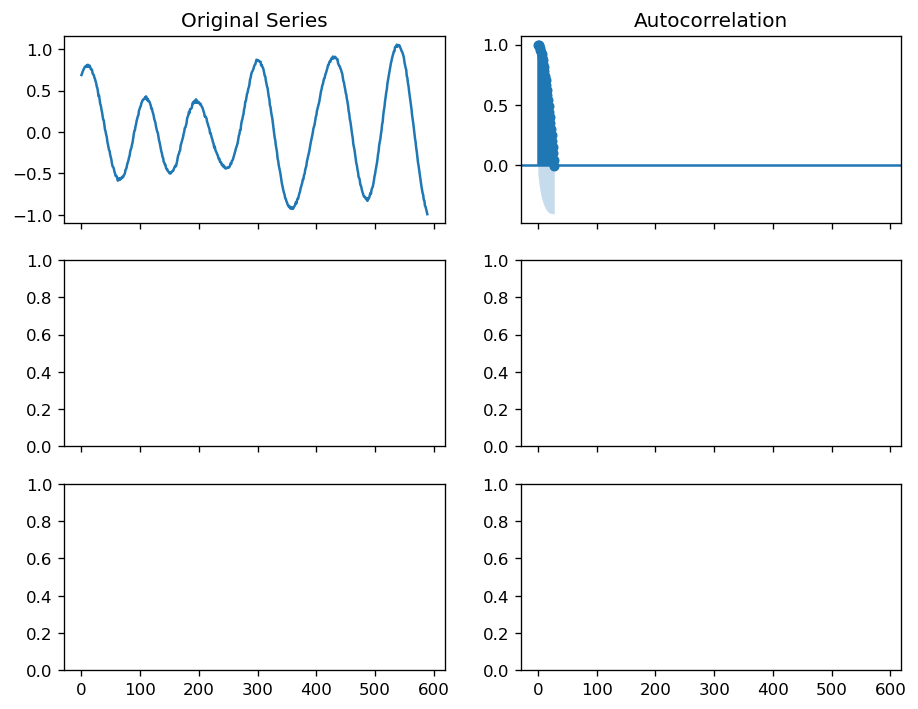

In [25]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()